In [1]:
from sklearn.datasets import load_iris

In [2]:
iris_data = load_iris()

In [3]:
import pandas as pd

In [4]:
iris = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)

In [5]:
iris['species'] = iris_data.target_names[iris_data.target]

In [6]:
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [7]:
iris_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


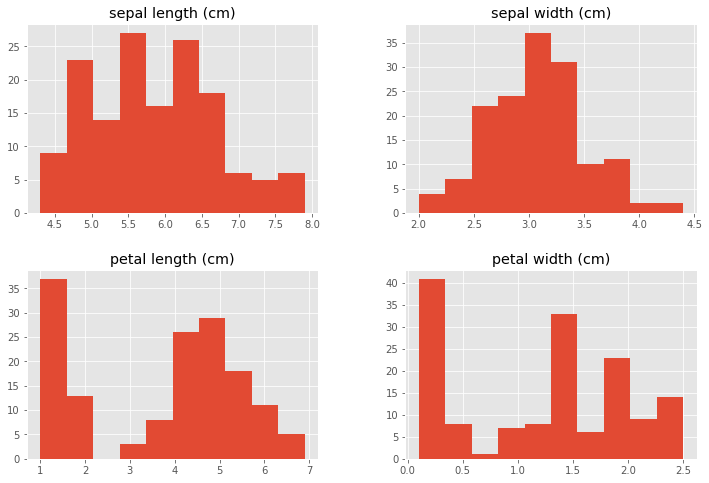

In [9]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

iris.hist(figsize=(12, 8))
plt.show()


In [10]:
inv_name_dict = {
    'setosa': 0,
    'versicolor': 1,
    'virginica': 2,
}

In [11]:
colors = [inv_name_dict[item] for item in iris['species']]

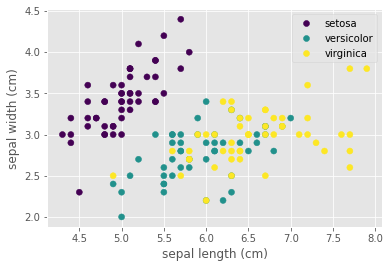

In [12]:
scatter = plt.scatter(iris['sepal length (cm)'], iris['sepal width (cm)'], c=colors)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend(handles=scatter.legend_elements()[0], labels=inv_name_dict.keys())
plt.show()

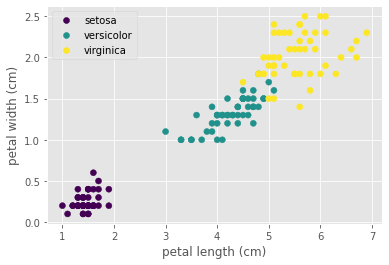

In [13]:
scatter = plt.scatter(iris['petal length (cm)'], iris['petal width (cm)'], c=colors)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend(handles=scatter.legend_elements()[0], labels=inv_name_dict.keys())
plt.show()

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
X = iris[['petal length (cm)', 'petal width (cm)']]
y = iris['species']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [19]:
y_train.value_counts()

virginica     35
versicolor    35
setosa        35
Name: species, dtype: int64

In [20]:
y_test.value_counts()

virginica     15
setosa        15
versicolor    15
Name: species, dtype: int64

In [21]:
knn = KNeighborsClassifier(n_neighbors=5)

In [22]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [23]:
pred = knn.predict(X_test)

In [24]:
pred[:5]

array(['virginica', 'setosa', 'setosa', 'versicolor', 'versicolor'],
      dtype=object)

In [25]:
y_pred_prob = knn.predict_proba(X_test)

In [26]:
y_pred_prob[10:12]

array([[1. , 0. , 0. ],
       [0. , 0.2, 0.8]])

In [27]:
pred[10:12]

array(['setosa', 'virginica'], dtype=object)

In [28]:
knn.score(X_test, y_test)

0.9777777777777777

In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
confusion_matrix(y_test, pred, labels=['setosa', 'versicolor', 'virginica'])

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 14]])

In [31]:
from sklearn.metrics import plot_confusion_matrix

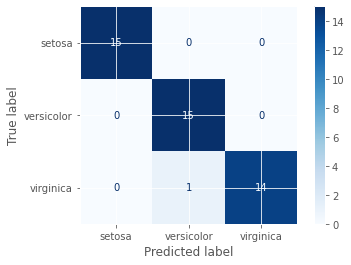

In [32]:
plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues)

In [33]:
import numpy as np

y_true = np.array(['dog', 'cat', 'cat', 'dog', 'dog'])

y_pred = np.array(['dog', 'cat', 'cat', 'cat', 'dog'])



confusion_matrix(y_true, y_pred, labels=['cat', 'dog'])

array([[2, 0],
       [1, 2]])

In [34]:
from sklearn.model_selection import cross_val_score

In [35]:
knn_cv = KNeighborsClassifier(n_neighbors=3)

In [36]:
cv_scores = cross_val_score(knn_cv, X, y, cv=5)

In [37]:
cv_scores

array([0.96666667, 0.96666667, 0.9       , 0.93333333, 1.        ])

In [38]:
cv_scores.mean()

0.9533333333333334

In [39]:
from sklearn.model_selection import GridSearchCV

# create new a knn model
knn2 = KNeighborsClassifier()

# create a dict of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(2, 10)}

# use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)

#fit model to data
knn_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [40]:
knn_gscv.best_params_

{'n_neighbors': 4}

In [41]:
knn_gscv.best_score_

0.9666666666666668

In [42]:
knn_final = KNeighborsClassifier(n_neighbors=knn_gscv.best_params_['n_neighbors'])

knn_final.fit(X, y)

y_pred = knn_final.predict(X)

knn_final.score(X, y)

0.9733333333333334

In [43]:
from sklearn.metrics import confusion_matrix 

y_true = np.array(['cat', 'dog', 'dog',

  'cat', 'fish', 'dog', 'fish'])

y_pred = np.array(['cat', 'cat', 'cat',

  'cat', 'fish', 'dog', 'fish'])

confusion_matrix(y_true, y_pred,

  labels=['cat', 'dog', 'fish'])


array([[2, 0, 0],
       [2, 1, 0],
       [0, 0, 2]])

In [45]:
y_true = np.array([1, 1, 0, 0])
y_pred = np.array([1, 0, 0, 0])

confusion_matrix(y_true, y_pred)

array([[2, 0],
       [1, 1]])

In [54]:
(confusion_matrix((y_true-1)*-1, (y_pred-1)*-1).T)/1.0

array([[1., 0.],
       [1., 2.]])